In [125]:
#Get pre-trained model
import cv2
import numpy as np
import matplotlib.pyplot as plt

yolo=cv2.dnn.readNet("yolov3-tiny.weights","yolov3-tiny.cfg")

In [126]:
#Get class names
f=open("coco.names")
classes=f.readlines()
classes=[name.strip() for name in classes]

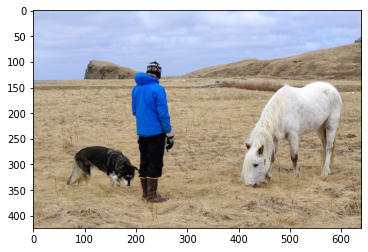

In [127]:
#Read image
image_path='person.jpg'
image=cv2.imread(image_path)
img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)

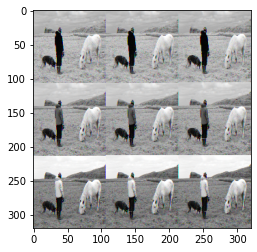

In [128]:
#Create blob for input
blob=cv2.dnn.blobFromImage(image, 1/255, (320,320), (0,0,0), swapRB=True, crop=False)
img=blob.reshape(320,320,3)
plt.imshow(img)

In [129]:
#Get predictions
yolo.setInput(blob)
layer=yolo.getUnconnectedOutLayersNames()
output=yolo.forward(layer)

In [130]:
#Get height and width of image
height,width=image.shape[:2]

In [131]:
#Get bounding boxes with high confidence value
boxes=[]
confidence=[]
class_index=[]

for out in output:
  for pred in out:
    values=pred[5:]
    index=np.argmax(values)
    conf=values[index]
    if conf>0.5:
      center_x=int(pred[0]*width)
      center_y=int(pred[1]*height)
      w=int(pred[2]*width)
      h=int(pred[3]*height)
      x=int(center_x-w/2)
      y=int(center_y-h/2)
      box=[x,y,w,h]
      boxes.append(box)
      confidence.append(conf)
      class_index.append(index)

In [132]:
#Non max suppression
index=cv2.dnn.NMSBoxes(boxes,confidence,0.5,0.5)

True

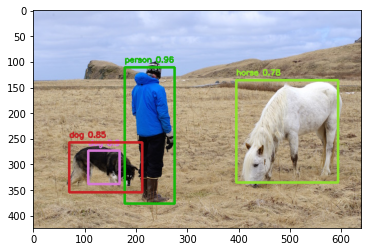

In [199]:
#Draw bounding boxes
img=cv2.imread(image_path)
img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
colors=np.random.uniform(0,255,size=(len(boxes),3))
font=cv2.FONT_HERSHEY_SIMPLEX

for i in index:
  x,y,w,h=boxes[i]
  color=colors[i]
  label=classes[class_index[i]]
  conf=str(round(confidence[i],2))
  cv2.rectangle(img, (x,y), (x+w,y+h), color, 4)
  cv2.putText(img, label+' '+conf, (x,y-10), font, 0.5, color, 2)

plt.imshow(img)
cv2.imwrite("object_detection.jpg", img)